# Video Games Sales EDA
## by Omer Alabas

## Dataset Overview

> This dataset was taken from kaggle.com. It contains a list of video games that sold more than 100,000 copies. It was generated by a scrape of vgchartz.com. It has more than 16,500 rows in total with each raw represting a game with the sales of that according to each region. It satisfies all Udacity rules for choosing a personal dataset. This data was last updated in 2017.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
#this function is used to add labels and title to the plot, and to set it to grid or not
def insert_labels_title(xlabel, ylabel, title, grid, legends):
    if(legends):
        plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(grid)

> Loading the dataset.

In [3]:
# Reading the datframe from vgsales.csv file
df_games_sales = pd.read_csv('vgsales.csv') 
df_games_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


> Changing the datatype of year from float to int.

In [5]:
df_games_sales.Year = df_games_sales.Year.fillna(df_games_sales.Year.mean()).astype(int)

In [6]:
df_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int32  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


In [7]:
df_games_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### What is the structure of your dataset?

> 16598 rows and 11 columns. Each raw represent a game. The columns include four categorical variables (Platform, Year, Genre, Publisher), and five numerical variables (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales) all in millions. <br/>
**Note: Global_Sales is the total sales for all regions.**

### What is/are the main feature(s) of interest in your dataset?

> My main interest is to figure out the features associated with higher game sales. Meaning I will foucus mainly on the _Global_sales_ variable.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The dataset is tidy, almost complete (few null values), simple and easy to understand. I am willig to investigate the relationship between the sales and other categorical variables like the _Platform_ or _Genre_. I also expect that some regoins have higher sales due to some factors like the game genre or the year of release.

### Exploring the Data generally

In [8]:
df_games_sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.399807,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.781426,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
df_games_sales.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [10]:
df_games_sales.Global_Sales

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16598, dtype: float64

In [11]:
df_games_sales.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [12]:
df_games_sales[df_games_sales.Global_Sales==df_games_sales.Global_Sales.min()].shape

(618, 11)

In [13]:
df_games_sales[df_games_sales.Name=='Minecraft']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
72,73,Minecraft,X360,2013,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
168,169,Minecraft,PS3,2014,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
297,298,Minecraft,PS4,2014,Misc,Sony Computer Entertainment Europe,1.38,1.87,0.12,0.65,4.02
643,644,Minecraft,XOne,2014,Misc,Microsoft Game Studios,1.43,0.76,0.00,0.22,2.41
713,715,Minecraft,PSV,2014,Misc,Sony Computer Entertainment Europe,0.28,0.79,0.87,0.32,2.25
4513,4515,Minecraft,WiiU,2016,Misc,Microsoft Game Studios,0.18,0.09,0.14,0.03,0.43


In [14]:
df_games_sales[df_games_sales.Name=='Grand Theft Auto V']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
44,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
197,198,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
1896,1898,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08


## Univariate Exploration

> First we want to explore the paltform categorical variables.

In [15]:
# to change the size
sb.set(rc={'figure.figsize':(10,8)})

### What is the plaform with the most games?

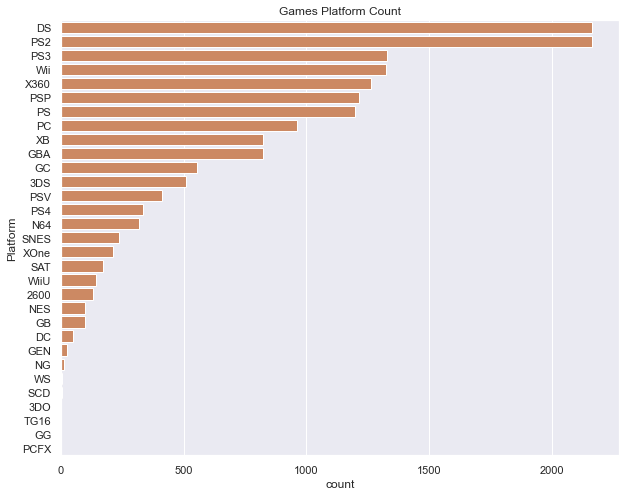

In [16]:
# setting basic parameters
color = sb.color_palette()[1]
plat_counts = df_games_sales.Platform.value_counts()
plat_order = plat_counts.index

# plotting a seaborn bar-chart
sb.countplot(data=df_games_sales, y='Platform', color=color, order = plat_order);

plt.title('Games Platform Count');

> The figure above shows that DS (Nintendo DS) and PS2 have the most games in this dataset. However this could be misleading since the dataset has records that goes back to 1980! So it would make sense that older platforms have more supporting games than newer ones.

> To solve this issue we will separate our data set into two dataframes, `df_old_gen` and `df_new_gen`. We will take 2007 as our breaking point (since 2007 is the median of the data).

In [17]:
df_old_gen = df_games_sales[df_games_sales.Year <= 2007]
df_old_gen.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


In [18]:
df_new_gen = df_games_sales[df_games_sales.Year > 2007]
df_new_gen.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
14,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82


In [19]:
df_old_gen.shape

(8594, 11)

In [20]:
df_new_gen.shape

(8004, 11)

> We will plot the two dataframes in a bar chart.

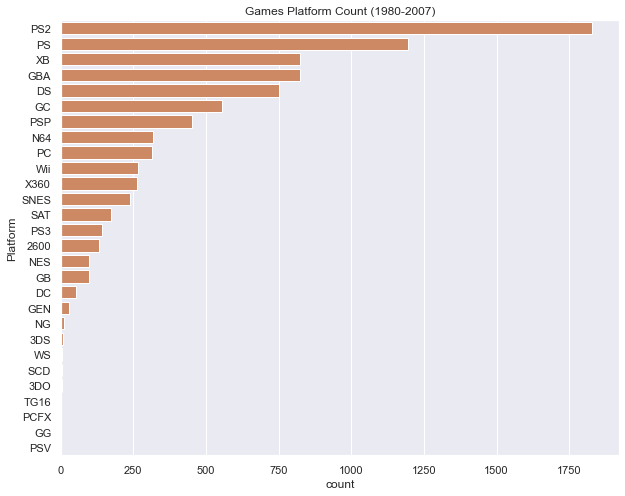

In [21]:
# setting basic parameters
color = sb.color_palette()[1]
plat_counts = df_old_gen.Platform.value_counts()
plat_order = plat_counts.index

# plotting a seaborn bar-chart
sb.countplot(data=df_old_gen, y='Platform', color=color, order = plat_order);

plt.title('Games Platform Count (1980-2007)');

> We can see that PS2 is the platform with the most games by far, followed by PS1. Looks like Sony was mass producing games in this period of time.

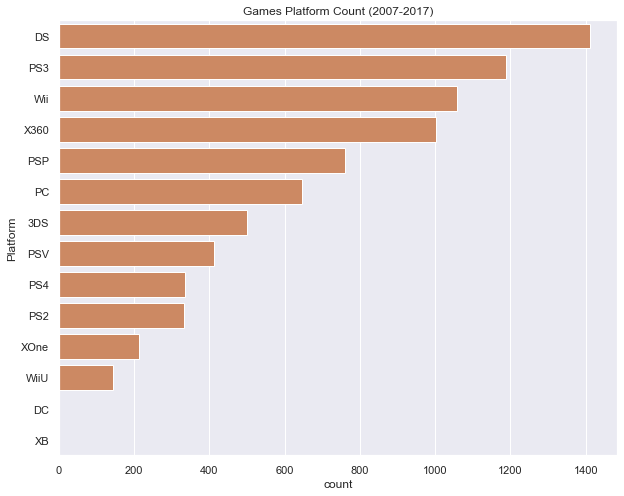

In [22]:
# setting basic parameters
color = sb.color_palette()[1]
plat_counts = df_new_gen.Platform.value_counts()
plat_order = plat_counts.index

# plotting a seaborn bar-chart
sb.countplot(data=df_new_gen, y='Platform', color=color, order = plat_order);

plt.title('Games Platform Count (2007-2017)');

> We can see that DS is the platform with the most games follwed by PS3 follwed by Wii. I did not know that Nintendo produses this huge amount of games!

> Finding the platform with most games btween 2015 and 2017.

In [23]:
df_last_five = df_games_sales[df_games_sales.Year >= 2015]
df_last_five.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
101,102,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
109,110,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96


In [24]:
df_last_five.shape

(962, 11)

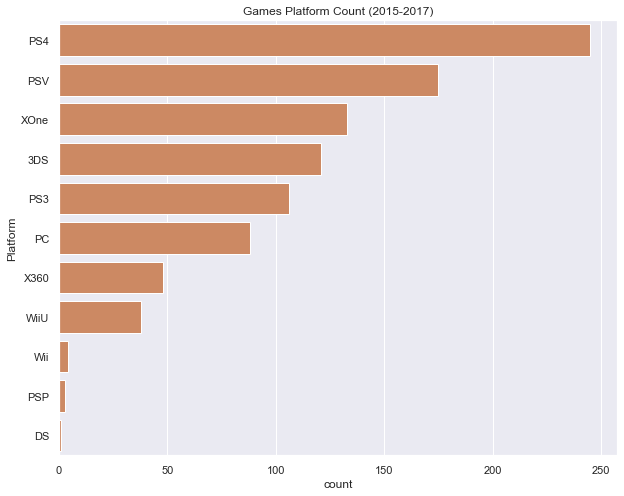

In [25]:
# setting basic parameters
color = sb.color_palette()[1]
plat_counts = df_last_five.Platform.value_counts()
plat_order = plat_counts.index

# plotting a seaborn bar-chart
sb.countplot(data=df_last_five, y='Platform', color=color, order = plat_order );

plt.title('Games Platform Count (2015-2017)');

> Sony again being first with PS4 having about 250 games in 2015-2017.

### What region have the most sales?

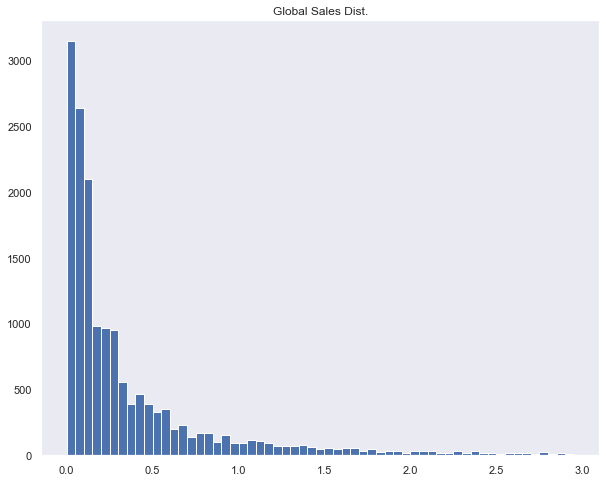

In [26]:
# Checking the dist. of Global_Sales
bins = np.arange(0, 3, 0.05)
plt.hist(data = df_games_sales, x = 'Global_Sales',bins= bins);
insert_labels_title('','','Global Sales Dist.',False,False)

> The above distribuation of the Global sales is strongly right skewed.

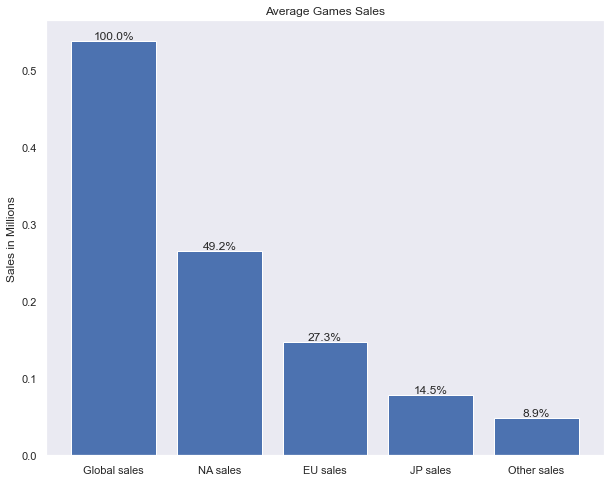

In [27]:
# The mean sales for every region
NA_Sales = df_games_sales['NA_Sales'].mean()
EU_Sales = df_games_sales['EU_Sales'].mean()
JP_Sales = df_games_sales['JP_Sales'].mean()
Other_Sales = df_games_sales['Other_Sales'].mean()
Global_Sales = df_games_sales['Global_Sales'].mean()

# plotting a seaborn bar-chart
bar = plt.bar([1, 2, 3, 4, 5], [Global_Sales, NA_Sales ,EU_Sales , JP_Sales, Other_Sales])
plt.xticks([1, 2, 3, 4, 5], ['Global sales','NA sales', 'EU sales', 'JP sales','Other sales']);
insert_labels_title('','Sales in Millions','Average Games Sales',False,False)

x_labels = [Global_Sales, NA_Sales ,EU_Sales , JP_Sales, Other_Sales]

# printing the sales above the bars by looping in x_labels and bar
for rect,label in zip(bar,x_labels):
    height = rect.get_height()
    text = '{:0.1f}%'.format(100*label/Global_Sales)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, text, ha='center', va='bottom')

> From the above graph it apears that North America has the most sales. It contributes to almost half of the global sales. Now let us see if this trend is diffrent if we took the year factor into consideration.

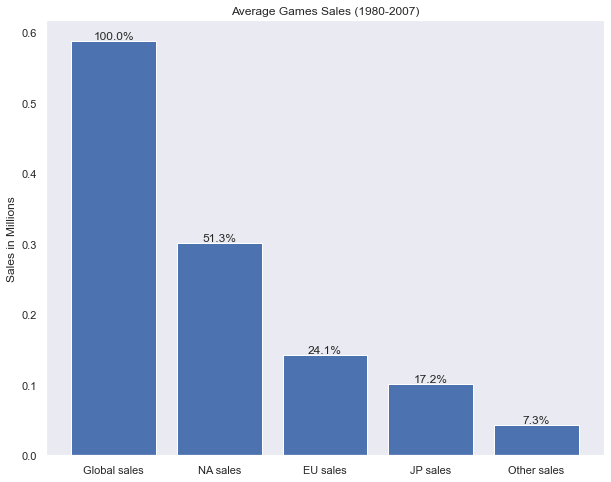

In [28]:
# The mean sales for every region in games from 1980-2007
NA_Sales = df_old_gen['NA_Sales'].mean()
EU_Sales = df_old_gen['EU_Sales'].mean()
JP_Sales = df_old_gen['JP_Sales'].mean()
Other_Sales = df_old_gen['Other_Sales'].mean()
Global_Sales = df_old_gen['Global_Sales'].mean()

# plotting a seaborn bar-chart
bar = plt.bar([1, 2, 3, 4, 5], [Global_Sales, NA_Sales ,EU_Sales , JP_Sales, Other_Sales])
plt.xticks([1, 2, 3, 4, 5], ['Global sales','NA sales', 'EU sales', 'JP sales','Other sales']);
# Polishing the graph using my insert_labels_title func.
insert_labels_title('','Sales in Millions','Average Games Sales (1980-2007)',False,False)
# Will be used to calculate the percentages in the loop
x_labels = [Global_Sales, NA_Sales ,EU_Sales , JP_Sales, Other_Sales]

# printing the sales % above the bars
for rect,label in zip(bar,x_labels):
    height = rect.get_height()
    text = '{:0.1f}%'.format(100*label/Global_Sales)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, text, ha='center', va='bottom')

> The trend is almost no diffrent, let us check the new generation of games. 

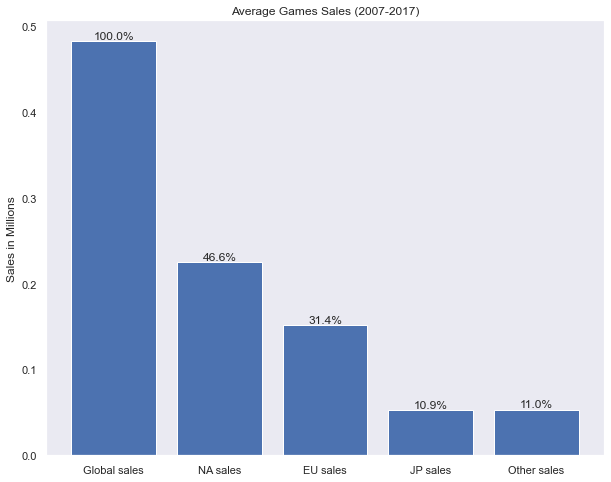

In [29]:
# The mean sales for every regionin in games from 2007-2017
NA_Sales = df_new_gen['NA_Sales'].mean()
EU_Sales = df_new_gen['EU_Sales'].mean()
JP_Sales = df_new_gen['JP_Sales'].mean()
Other_Sales = df_new_gen['Other_Sales'].mean()
Global_Sales = df_new_gen['Global_Sales'].mean()

# plotting a seaborn bar-chart
bar = plt.bar([1, 2, 3, 4, 5], [Global_Sales, NA_Sales ,EU_Sales , JP_Sales, Other_Sales])
plt.xticks([1, 2, 3, 4, 5], ['Global sales','NA sales', 'EU sales', 'JP sales','Other sales']);
# Polishing the graph using my insert_labels_title func.
insert_labels_title('','Sales in Millions','Average Games Sales (2007-2017)',False,False)
# Will be used to calculate the percentages in the loop
x_labels = [Global_Sales, NA_Sales ,EU_Sales , JP_Sales, Other_Sales]

# printing the sales above the bars
for rect,label in zip(bar,x_labels):
    height = rect.get_height()
    text = '{:0.1f}%'.format(100*label/Global_Sales)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, text, ha='center', va='bottom')

> We can see some changes for the percentges here. For example EU has higher sales percentage copmared to old generation games. Could this mean that EU is has become more involved in the game indstruy recentley? Also other regions sales has become hihger. Could this mean that gaming is becmoming more popular in these regions? Moreover, we can that JP has higher sales in the old generation of games by 7%.

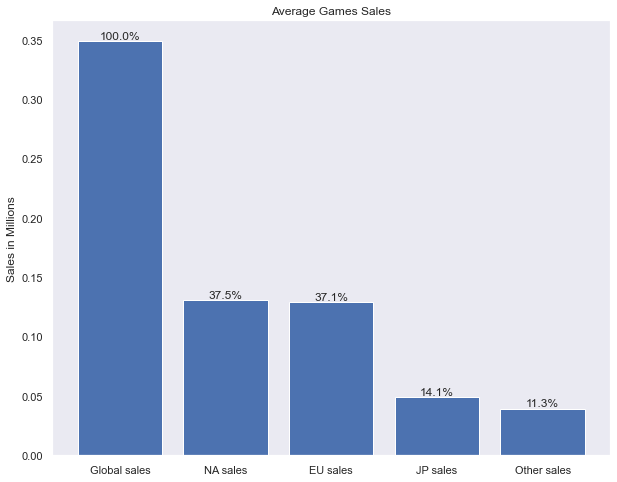

In [30]:
# The mean sales for every region in 201
NA_Sales = df_last_five['NA_Sales'].mean()
EU_Sales = df_last_five['EU_Sales'].mean()
JP_Sales = df_last_five['JP_Sales'].mean()
Other_Sales = df_last_five['Other_Sales'].mean()
Global_Sales = df_last_five['Global_Sales'].mean()

# plotting a seaborn bar-chart
bar = plt.bar([1, 2, 3, 4, 5], [Global_Sales, NA_Sales ,EU_Sales , JP_Sales, Other_Sales])
plt.xticks([1, 2, 3, 4, 5], ['Global sales','NA sales', 'EU sales', 'JP sales','Other sales']);
# Polishing the graph
insert_labels_title('','Sales in Millions','Average Games Sales',False,False)

# Will be used to calculate the percentages in the loop
x_labels = [Global_Sales, NA_Sales ,EU_Sales , JP_Sales, Other_Sales]

# printing the sales above the bars by looping in x_labels and bar
for rect,label in zip(bar,x_labels):
    height = rect.get_height()
    text = '{:0.1f}%'.format(100*label/Global_Sales)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, text, ha='center', va='bottom')

> The figure above shows that in recent years (2015-2017), EU has caught up to NA. Does this mean that EU is becoming more intrested into games in the last couple of years? 

### What is the genre with the most games?

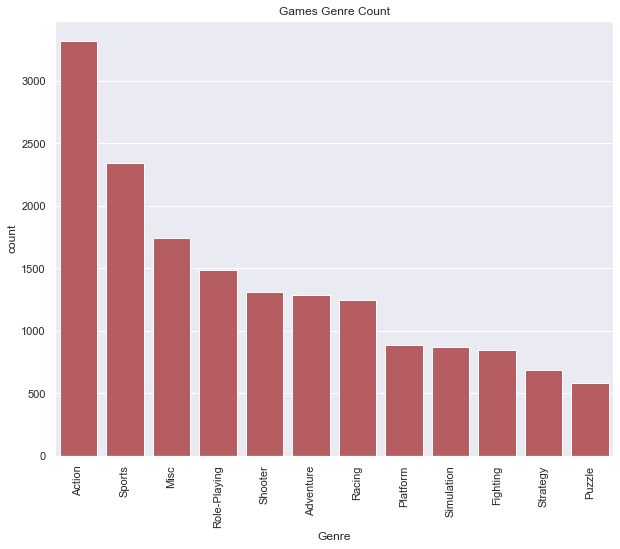

In [31]:
# setting basic parameters
color = sb.color_palette()[3]
plat_counts = df_games_sales.Genre.value_counts()
plat_order = plat_counts.index

# plotting a seaborn bar-chart
sb.countplot(data=df_games_sales, x='Genre', color=color, order = plat_order);
plt.xticks(rotation=90)

# Polishing the graph
plt.title('Games Genre Count');

> It did not surprise me that Action is the most common genre in video games.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Global_Sales varible has right skewed distribution, which indicates that most the games have low sales. Some games had very high sales (50>) which whould disrupt the histogram, so I made the range smaller [0,3]. In addition, I needed to split the dataframe into two dataframes, one of old generation games and the other of old generation games. This resulted in diffrent outcomes compared to when the dataset was one. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was no unusual distribution. However I to splited the dataframe into two dataframes, one of old generation games and the other of old generation games. This was done because if we want to know which platform has the most supported games or has the most sales we will have to consider the year of realse since older platforms have been in the market for longer period of time.

## Bivariate Exploration

### Does the game genre contribute to the sales?

> We will use a box-plot to see this relation.

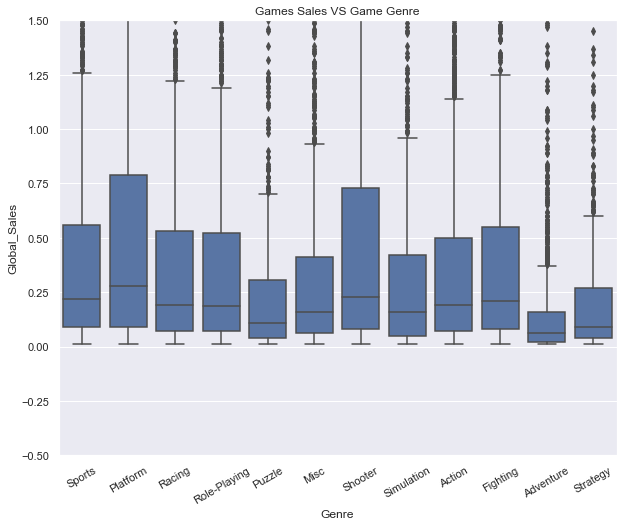

In [32]:
# setting basic parameters
color = sb.color_palette()[0]
counts = df_games_sales.Genre.value_counts()

# plotting a ver. box-plot
sb.boxplot(data=df_games_sales, x='Genre', y='Global_Sales', color=color)
plt.xticks(rotation=30)
# Setting the y_limit to zoom in
plt.ylim(-0.5,1.5) 
plt.title('Games Sales VS Game Genre');

> The above box-plot shows that the global sales has many outliers. However we can see clearly that Strategy and Adventure games have low sales compared to other genres.

> Let us see if this is diffrent in new generation games (2007-2017).

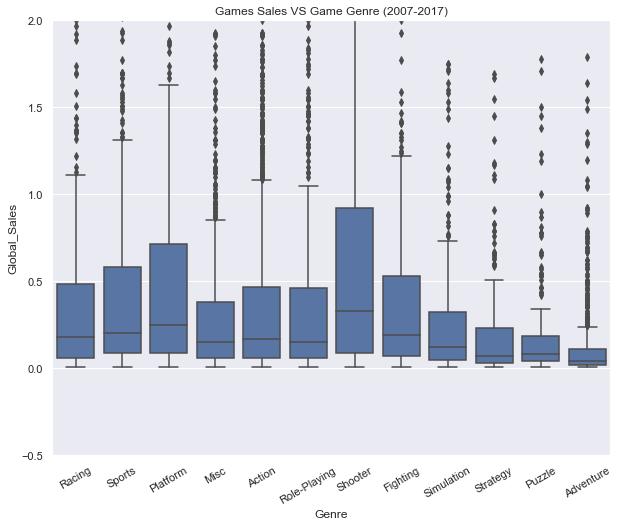

In [33]:
# setting basic parameters
color = sb.color_palette()[0]
counts = df_new_gen.Genre.value_counts()

# plotting a ver. box-plot
sb.boxplot(data=df_new_gen, x='Genre', y='Global_Sales', color=color)
plt.xticks(rotation=30)
# Setting the y_limit to zoom in
plt.ylim(-0.5,2) 
plt.title('Games Sales VS Game Genre (2007-2017)');

> Interestingly, the pattren is diffrent than before. Here we can see clearly that Shooter games are making more money than other games genre. Could this be the effect of games like COD or Fortnite and many other new shooter games?

> let us check this pattren in recent games (2015-2017).

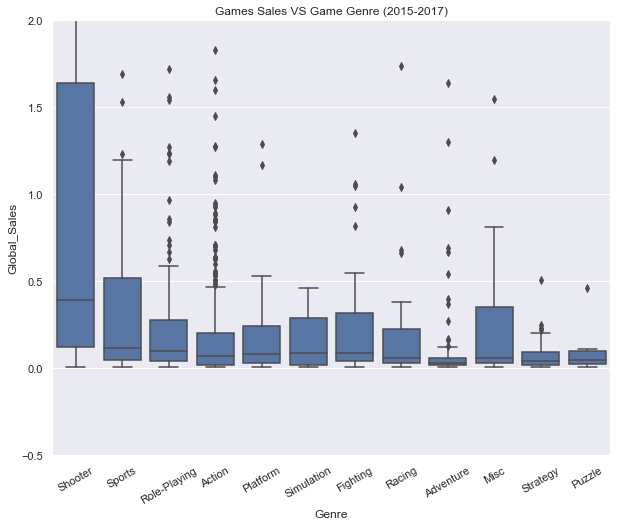

In [34]:
# setting basic parameters
color = sb.color_palette()[0]
counts = df_last_five.Genre.value_counts()

# plotting a ver. box-plot
sb.boxplot(data=df_last_five, x='Genre', y='Global_Sales', color=color)
plt.xticks(rotation=30)
plt.ylim(-0.5,2) 
plt.title('Games Sales VS Game Genre (2015-2017)');

> Again, Shooter games rise above the rest. Intresting.

### Does the game platform contribute to the sales?

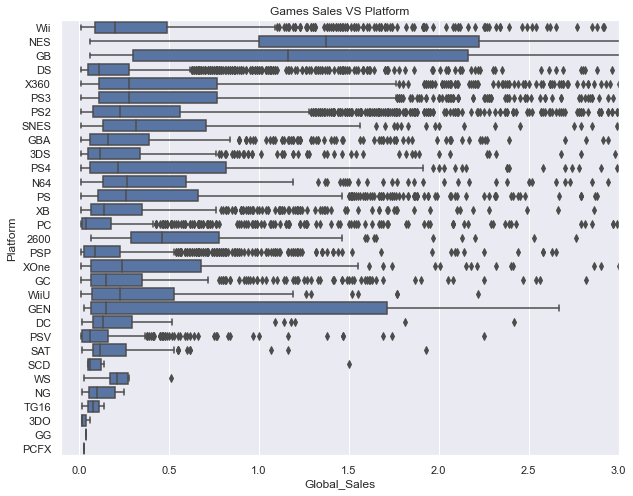

In [35]:
# setting basic parameters
color = sb.color_palette()[0]
counts = df_games_sales.Genre.value_counts()

# plotting a hori. box-plot
sb.boxplot(data=df_games_sales, x='Global_Sales', y='Platform', color=color)
# Setting the x_limit to zoom in
plt.xlim(-0.1,3)
plt.title('Games Sales VS Platform');

(-0.1, 3.0)

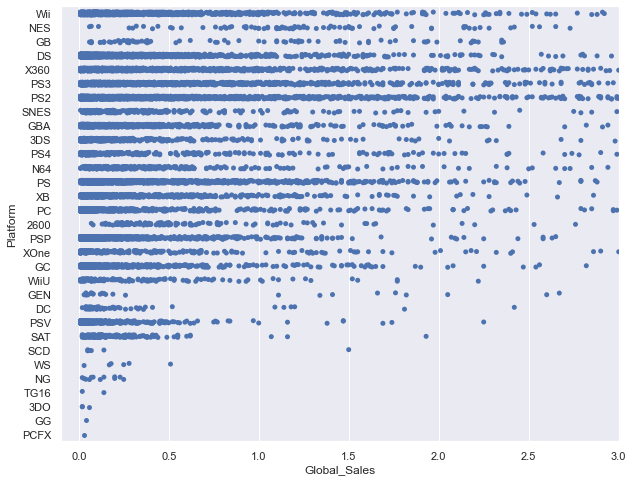

In [36]:
# To check the dist. of points
sb.stripplot(data = df_games_sales, x = 'Global_Sales', y = 'Platform',color = color)
plt.xlim(-0.1,3)

> NES (nintendo entertainment system) games sold more than other consoles. However, as shown earlier this could be misleading since NES has been for longer time.

> Taking the generation into consideration.

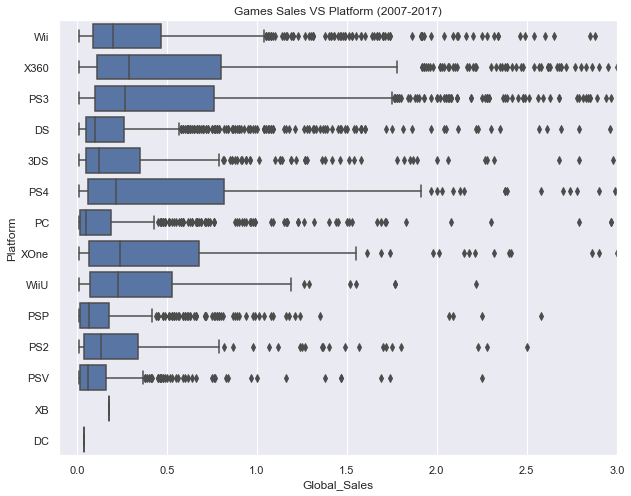

In [37]:
# setting basic parameters
color = sb.color_palette()[0]
counts = df_new_gen.Platform.value_counts()

# plotting a box-plot
sb.boxplot(data=df_new_gen, x='Global_Sales', y='Platform', color=color)
# Setting the x_limit to zoom in
plt.xlim(-0.1,3)
plt.title('Games Sales VS Platform (2007-2017)' );

In [38]:
df_new_gen[df_new_gen.Platform=='NES'].shape

(0, 11)

In [39]:
df_games_sales[df_games_sales.Platform=='NES'].shape

(98, 11)

In [40]:
df_games_sales[df_games_sales.Platform=='NES'].Global_Sales.max()

40.24

> Again the pattren changed, surprisingly, DES games were not sold at this period of time (2007-2017). I know it is old but it made so much money in short amount of time! And with only 98 title of games!

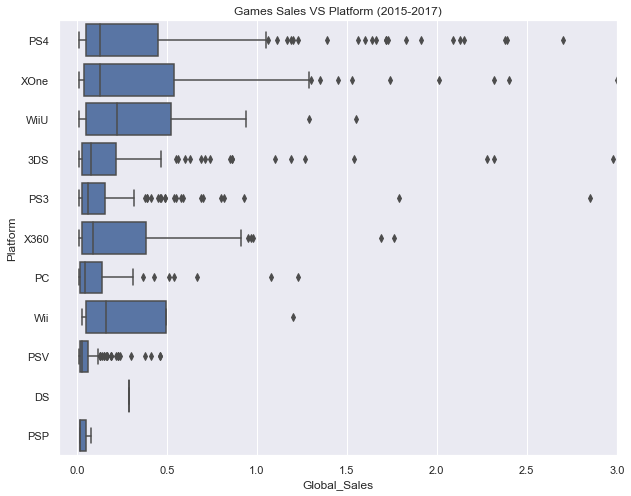

In [41]:
# setting basic parameters
color = sb.color_palette()[0]
counts = df_last_five.Platform.value_counts()

# plotting a box-plot
sb.boxplot(data=df_last_five, x='Global_Sales', y='Platform', color=color)
# Setting the x_limit to zoom in
plt.xlim(-0.1,3)
plt.title('Games Sales VS Platform (2015-2017)');

### The change of sales over time.

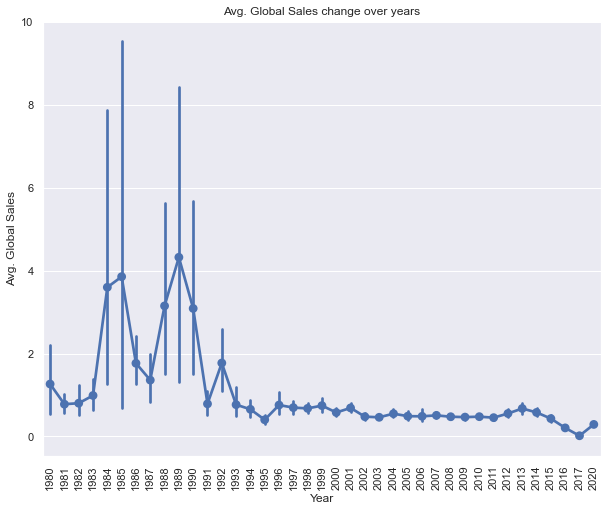

In [42]:
# Plotting a time based graph
sb.pointplot(data=df_games_sales, x='Year', y='Global_Sales', color=color)
plt.xticks(rotation=90)
# Polishing the graph
plt.title('Avg. Global Sales change over years')
plt.ylabel('Avg. Global Sales');

> This is very intresting! According to the graph, the old generation apears to have higher sales than recent years! There has to be a reason for that. My guess is that sincne in recent years the games are more, then maybe many games with low sales are bringing the mean of sales down. Also you can see the long range of data in old years meaning that the data is scattared.

### Relations between regions sales.

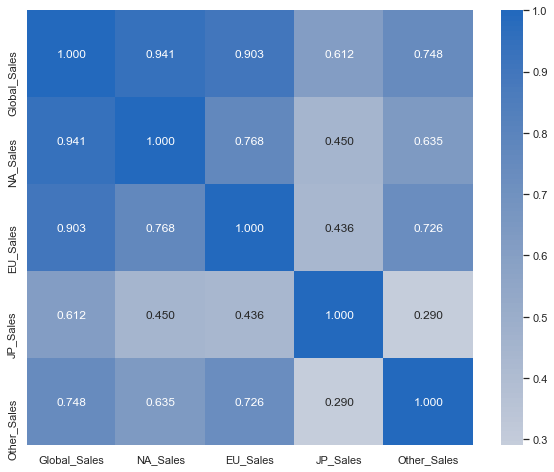

In [43]:
# Checking the correlations between num_vars
regions_sales = ['Global_Sales','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']
plt.figure(figsize = [10, 8])
sb.heatmap(df_games_sales[regions_sales].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

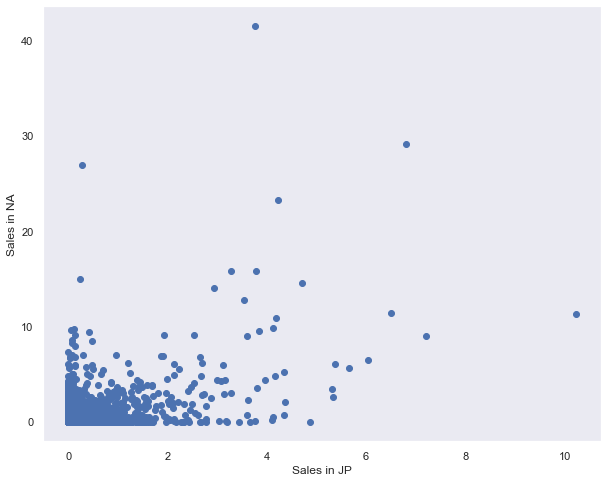

In [44]:
# Checking how NA_Sales and JP_Sales interact with each other
plt.scatter(data = df_games_sales, x = 'JP_Sales', y = 'NA_Sales')
insert_labels_title('Sales in JP','Sales in NA','',False,False)

(0.0, 15.0)

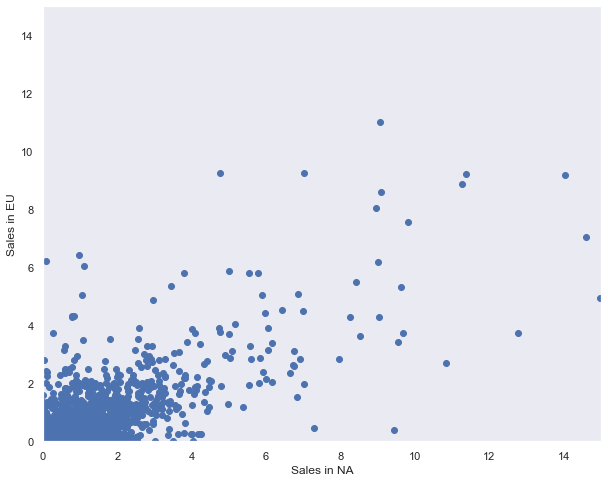

In [45]:
# Checking how NA_Sales and EU_Sales interact with each other
plt.scatter(data = df_games_sales, x = 'NA_Sales', y = 'EU_Sales')
insert_labels_title('Sales in NA','Sales in EU','',False,False)
plt.ylim(0,15)
plt.xlim(0,15)

> The heatmap and scatter plots add new findings. It proves that NA and EU contribute the most to the _Global_Sales_, this is shown by the strong correlation between them. JP_Sales however, have the weakest correlation with the other regions sales, 0.450 and 0.436 with NA and EU respectively. On the other hand EU and NA have a stronger correlation between them.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I found out that _Global_Sales_ pattrens change from one generation to the other. Perhaps this is due to the fact that the game indstry is evolving continuously, and gaming platforms are changing.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> What shook me is that older generations genearlly has higher sales. There are many possible reasons for that. My guess is that since in recent years the games are more, then maybe many games with low sales are bringing the mean of sales down. Also you can see the long range of data in old years meaning that the data is scattared. Or it could be to some bias of the data. Also, the data showed that _JP_Sales_ have the weakest correlation with the other regions sales. Could this mean that JP market have diffrent taste in games? On the other hand EU and NA have a stronger correlation in sales.

## Multivariate Exploration

### Relations between regions sales.

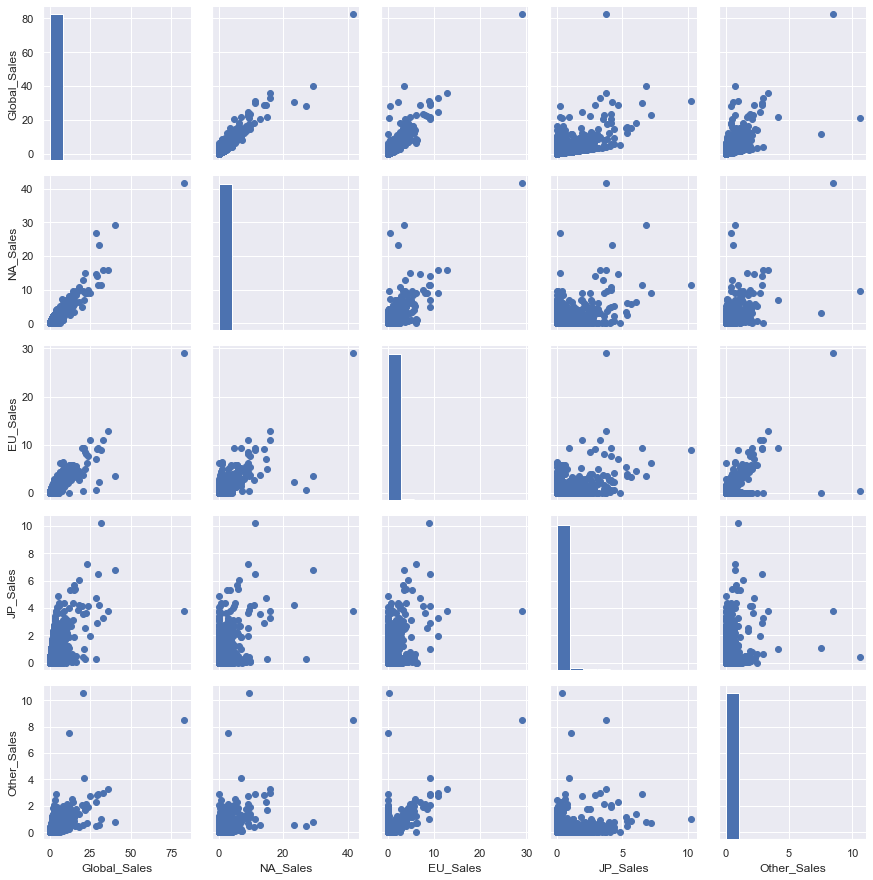

In [46]:
# Checking how num_vars interact with each other
g = sb.PairGrid(data = df_games_sales, vars = ['Global_Sales','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

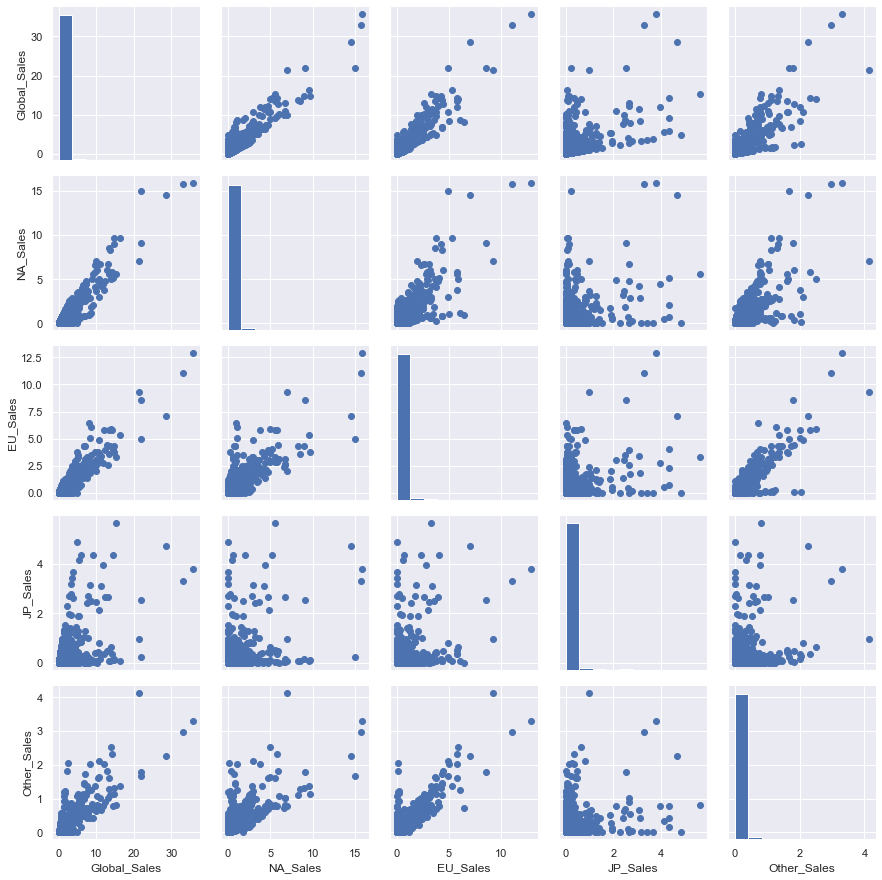

In [47]:
# Checking how num_vars interact with each other
g = sb.PairGrid(data = df_new_gen, vars = ['Global_Sales','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

### Relations between regions sales and genres.

In [48]:
df_games_sales['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

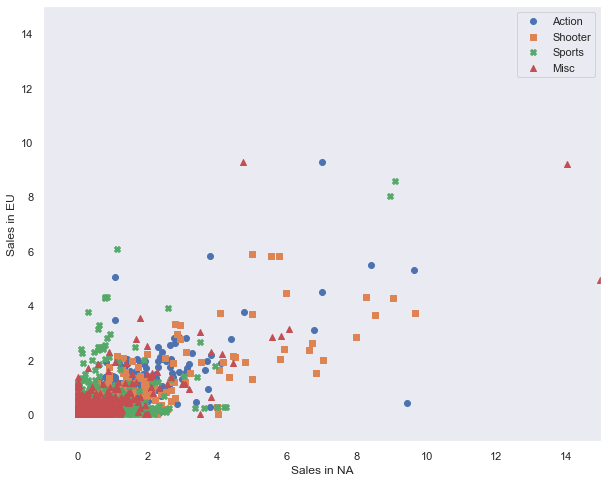

In [49]:
# Most common genres
cat_markers = [['Action', 'o'],['Shooter', 's'],['Sports','X'],['Misc','^']]

# To loop thro the cat_markers and plot each marker
for cat, marker in cat_markers:
    df_cat = df_games_sales[df_games_sales['Genre'] == cat]
    plt.scatter(data = df_cat, x = 'NA_Sales', y = 'EU_Sales', marker = marker)
plt.legend(['Action','Shooter','Sports','Misc'])
# Setting a y_limit and x_limit to zoom in
plt.ylim(-1,15)
plt.xlim(-1,15)
# Polishing the graph
insert_labels_title('Sales in NA','Sales in EU','',False,False);

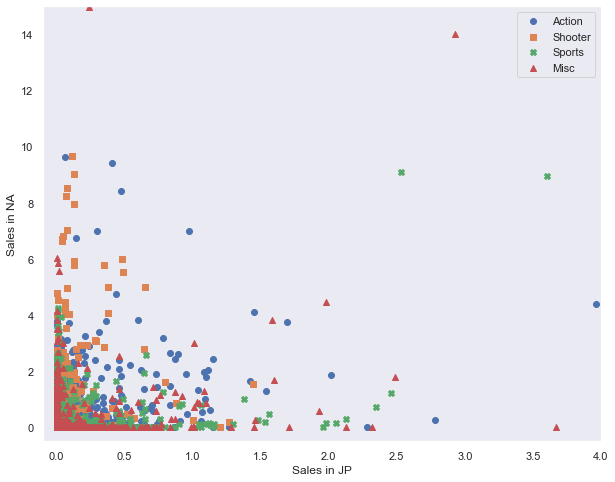

In [50]:
# Most common genres
cat_markers = [['Action', 'o'],['Shooter', 's'],['Sports','X'],['Misc','^']]

# To loop thro the cat_markers and plot each marker
for cat, marker in cat_markers:
    df_cat = df_games_sales[df_games_sales['Genre'] == cat]
    plt.scatter(data = df_cat, x = 'JP_Sales', y = 'NA_Sales', marker = marker)
plt.legend(['Action','Shooter','Sports','Misc'])

# Setting a y_limit and x_limit to zoom in
plt.ylim(-0.5,15)
plt.xlim(-0.1,4)
# Polishing the graph
insert_labels_title('Sales in JP','Sales in NA','',False,False)

> We can see that Misc games have lower sales in general in both graphs. While shooter games are higher.

<ipython-input-51-9491013f7512>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cat = df_new_gen[df_games_sales['Platform'] == cat]


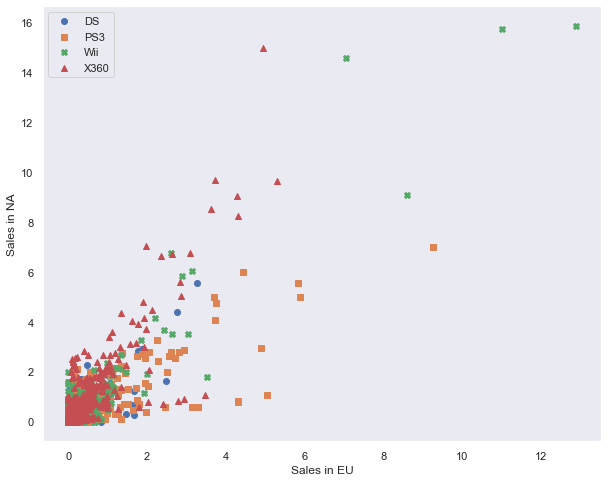

In [51]:
# Most common genres
cat_markers = [['DS', 'o'],['PS3', 's'],['Wii','X'],['X360','^']]

# To loop thro the cat_markers and plot each marker
for cat, marker in cat_markers:
    df_cat = df_new_gen[df_games_sales['Platform'] == cat]
    plt.scatter(data = df_cat, x = 'EU_Sales', y = 'NA_Sales', marker = marker)
plt.legend(['DS','PS3','Wii','X360'])

# Polishing the graph
insert_labels_title('Sales in EU','Sales in NA','',False,False)

### Sales and games genres and platforms.

In [52]:
df_new_gen['Platform'].nunique()

14

In [53]:
df_new_gen['Platform'].value_counts()

DS      1412
PS3     1187
Wii     1059
X360    1001
PSP      761
PC       646
3DS      500
PSV      412
PS4      336
PS2      332
XOne     213
WiiU     143
DC         1
XB         1
Name: Platform, dtype: int64

> This part will be done with the new generation dataset, since it is more relevent to our time.

C:\Users\a\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\a\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


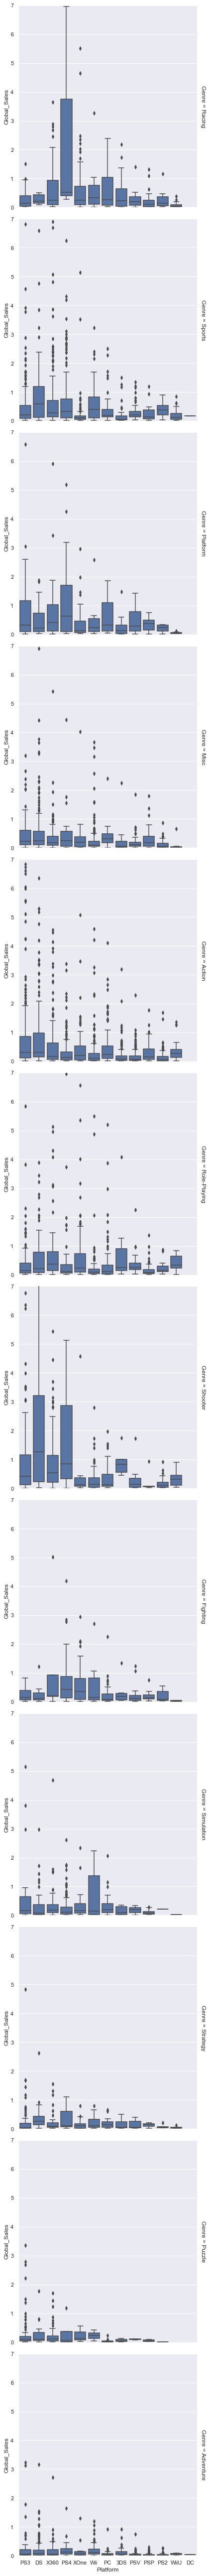

In [54]:
# Faceting the graphs to compare between them easily
g = sb.FacetGrid(data = df_new_gen, row = 'Genre',margin_titles = True, size = 6)
plt.ylabel('Global_Sales')
# Setting a y_limit to zoom in
plt.ylim(0,7)
g.map(sb.boxplot, 'Platform', 'Global_Sales');

It is pretty hard to read the above grid, however the following has been found:
- PS4 sold good in the following genres: Racing, Shooter, Platform
- DS sold good in the following genres: Shooter, Action, Sports

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The problem with this data is that it has only one type of numeric varible, which is the sales, so no much can be done. Nevertheless, it has been discoverd that PS4 games in the following genres: Racing, Shooter, Platform, sold very well in (2007-2017). Also, DS sold good in the following genres: Shooter, Action, Sports. Finally, shooter games in general have higher sales than other genres.

### Were there any interesting or surprising interactions between features?

> No surprising interaction has been noted. But according to the scatter plot, NU and NA have a strong correlation in the sales. Could this due to the fact that their gaming market is simialr?